## Import Modules

In [87]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

## Loading the dataset

In [88]:
data= pd.read_csv("seoul_bike_data.csv")

In [89]:
# Copy the data for backup
df = data.copy()

In [90]:
# Getting feel of the data
df.head()

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


Data pre-processing
Understanding data

In [91]:
# Data shape
df.shape

(8394, 9)

In [92]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394 entries, 0 to 8393
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bikes_rented  8394 non-null   int64  
 1   temp          8394 non-null   float64
 2   humidity      8394 non-null   int64  
 3   wind_speed    8394 non-null   float64
 4   visibility    8394 non-null   int64  
 5   dew_temp      8394 non-null   float64
 6   solar_rad     8394 non-null   float64
 7   rainfall      8394 non-null   float64
 8   snowfall      8394 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 590.3 KB


In [93]:
# Statistical info 
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
bikes_rented,8394.0,731.374792,643.616638,2.0,214.00,546.00,1088.00,3556.00
temp,8394.0,12.812009,12.108977,-17.8,3.10,13.60,22.70,39.40
humidity,8394.0,58.074696,20.483539,0.0,42.00,57.00,74.00,98.00
wind_speed,8394.0,1.740481,1.026341,0.1,1.00,1.50,2.30,7.40
visibility,8394.0,1433.226590,609.803729,27.0,932.25,1690.00,2000.00,2000.00
dew_temp,8394.0,3.964260,13.242399,-30.6,-5.10,4.80,15.20,27.20
solar_rad,8394.0,0.572427,0.870429,0.0,0.00,0.01,0.94,3.52
rainfall,8394.0,0.149261,1.126075,0.0,0.00,0.00,0.00,35.00
snowfall,8394.0,0.077949,0.445800,0.0,0.00,0.00,0.00,8.80


## Preprocessing the data

In [94]:
# Checking null values of data 
df.isna().sum()

bikes_rented    0
temp            0
humidity        0
wind_speed      0
visibility      0
dew_temp        0
solar_rad       0
rainfall        0
snowfall        0
dtype: int64

In [95]:
# Checking duplicate
df.duplicated().sum()

0

## Exploratory data analysis 

In [96]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')

In [97]:
numeric_features.head()

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


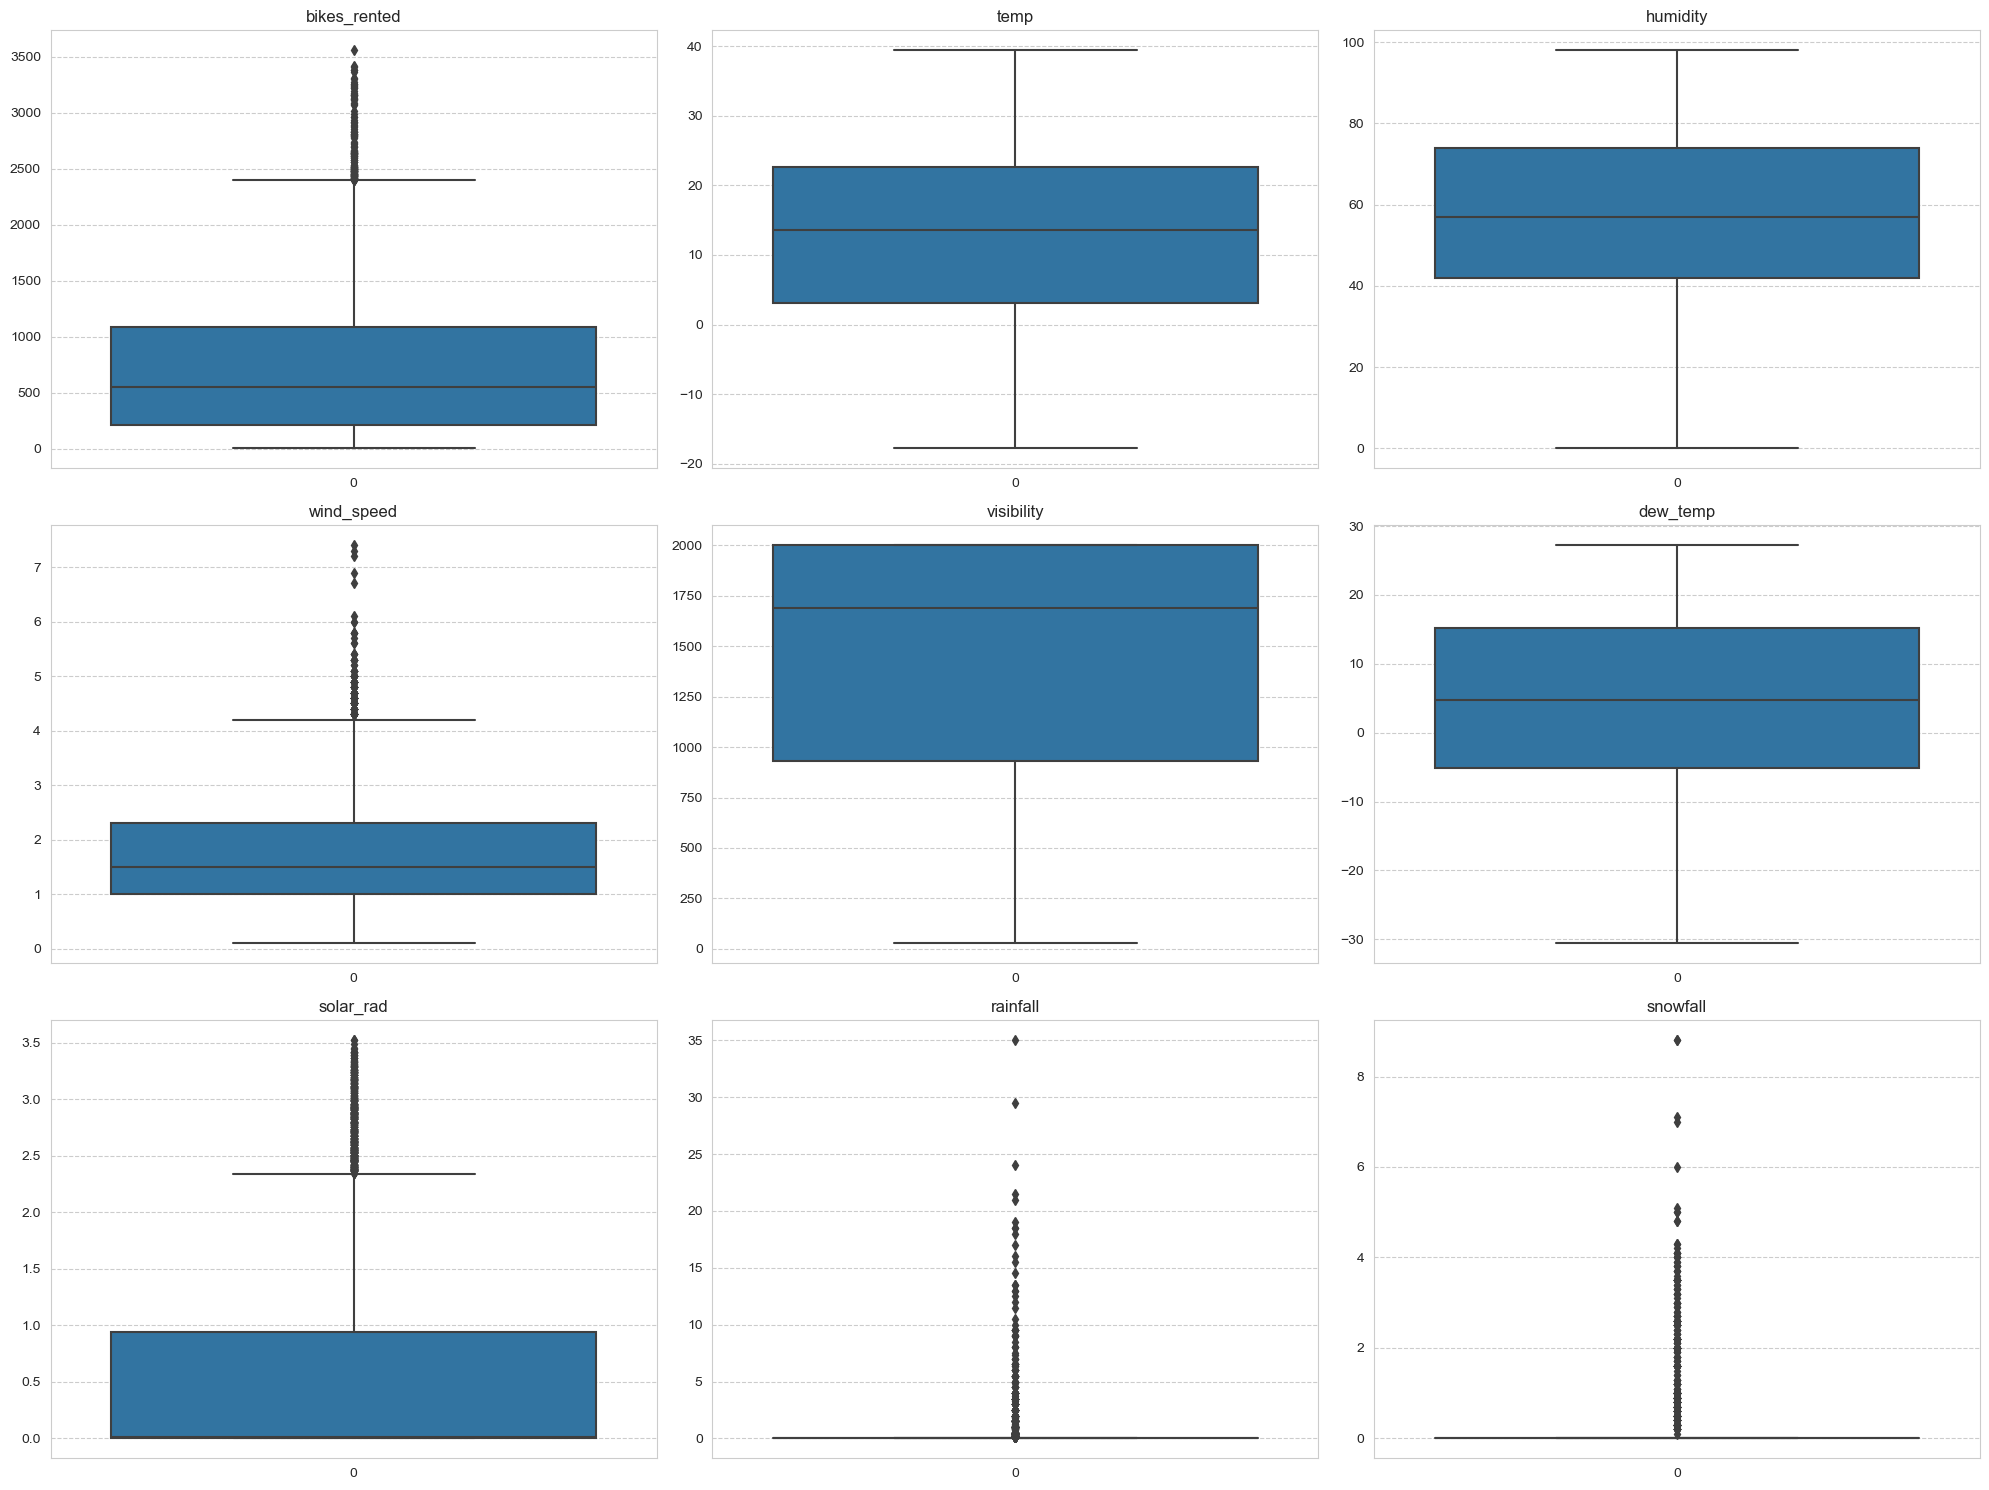

In [98]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

We don't think of worry about outliers in this data 

## Now the time of Explore our numerical feature and Trying to take some important information from the Numeical feature

## Pays little attention to the skewness of our numerical features

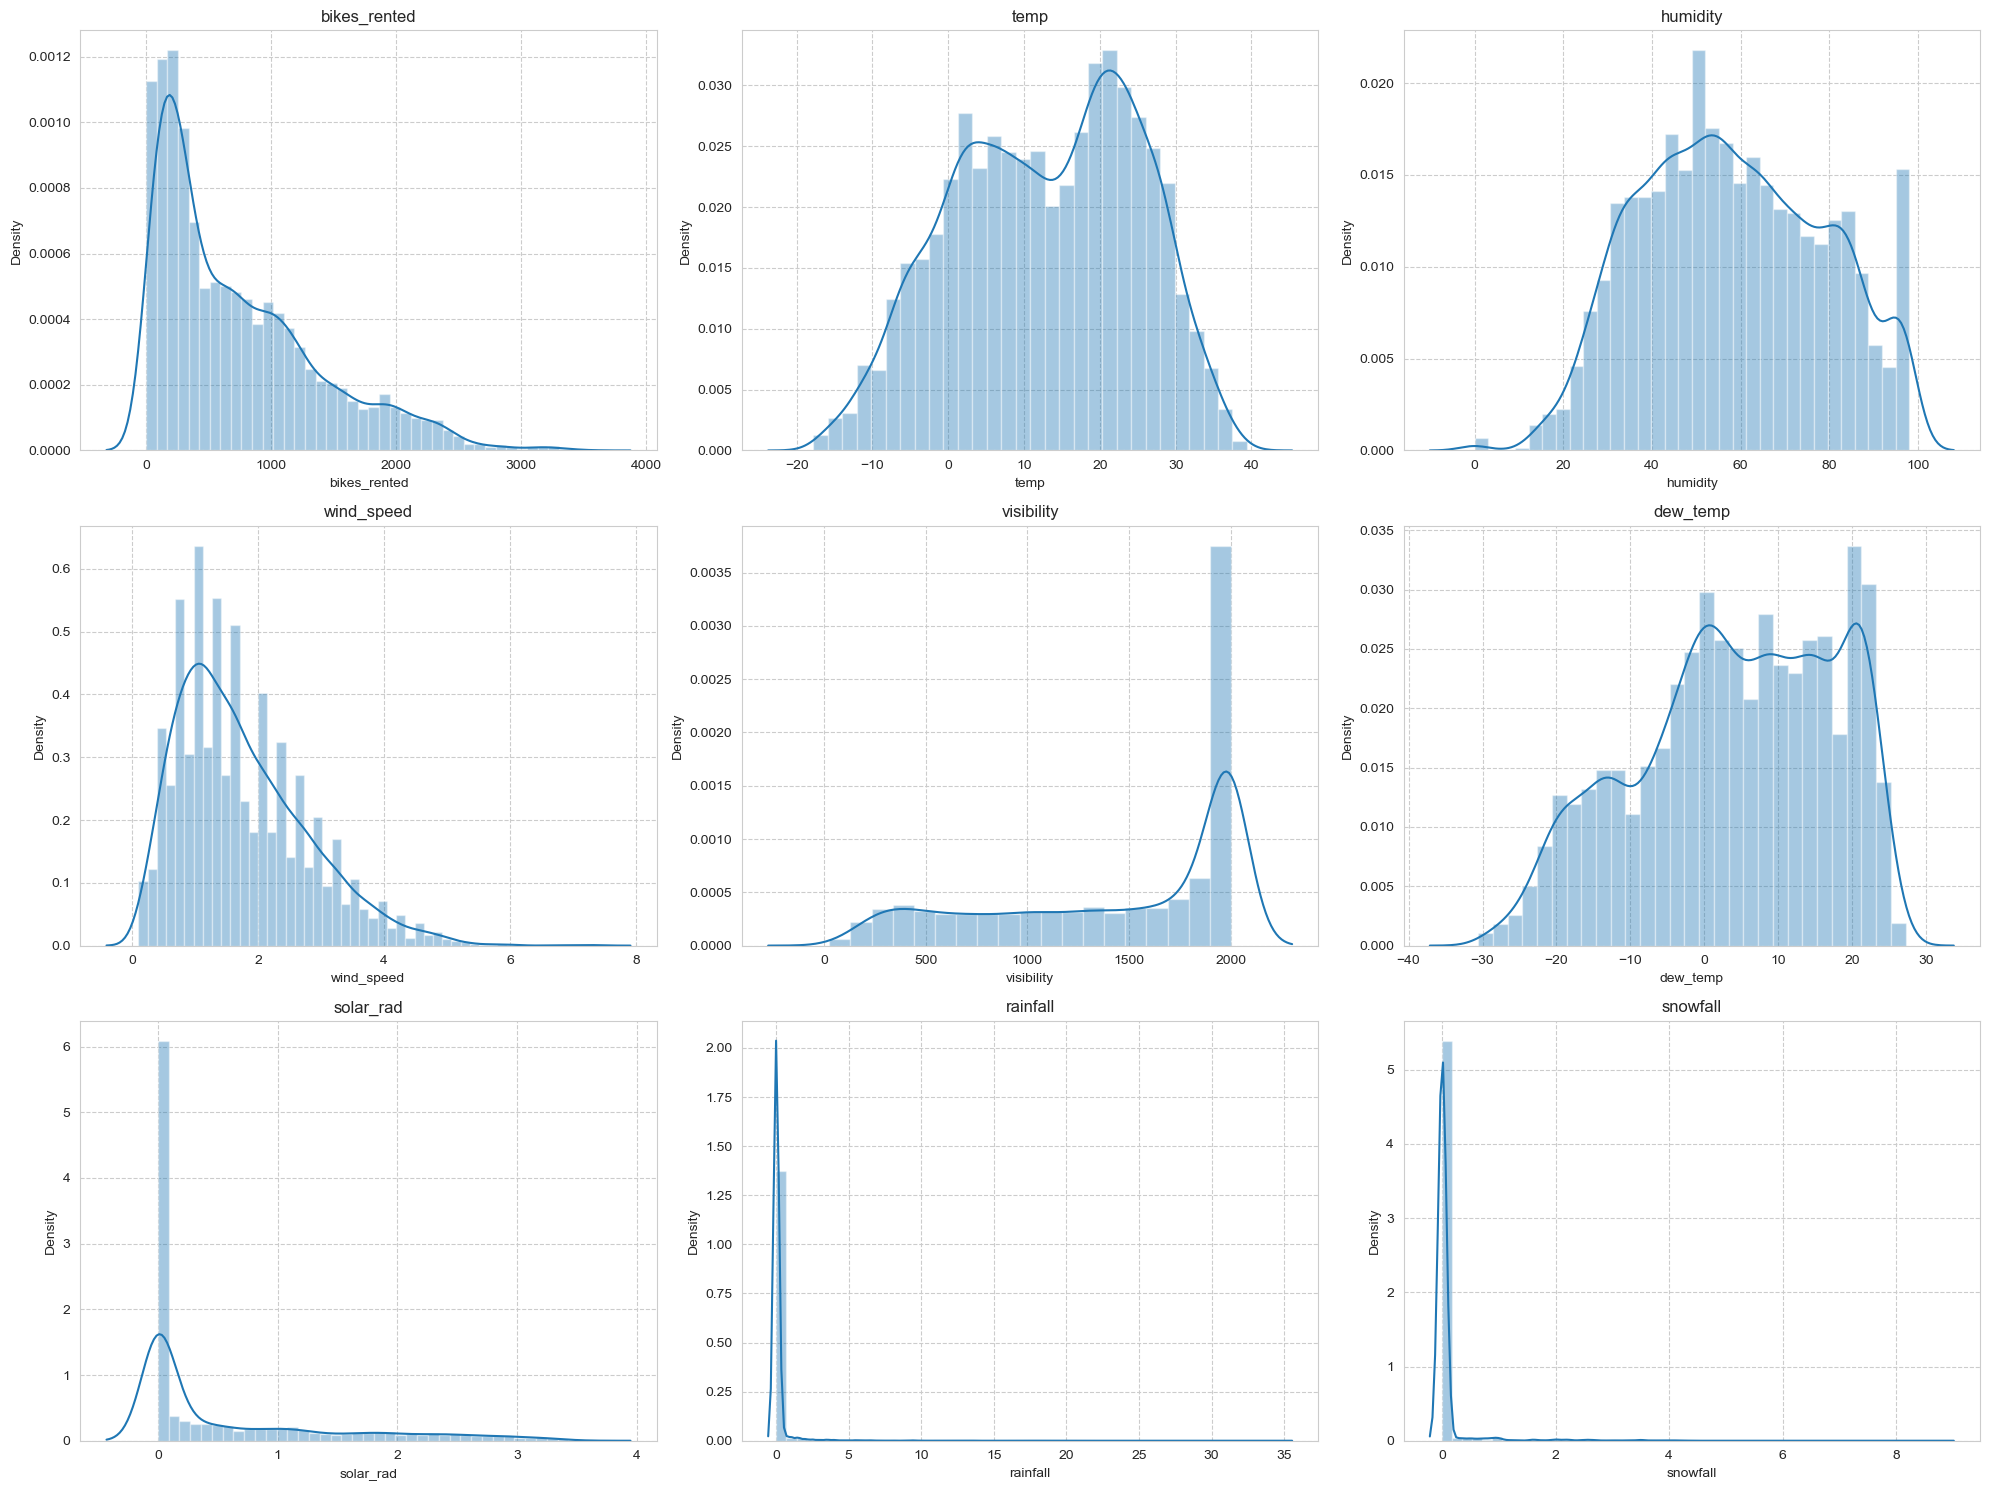

In [99]:
# Distrubution of Data
n=1
plt.figure(figsize=(20,15))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()

# In this plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms

## Right skewed columns are
Rented Bike Count (Its also our Dependent variable), 
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m), 
Dew point temperature(°C)


## Let's try something else to get information from our Numerical features

## Now is the time to know what is the correlation of our dependent variable with the independent features

In [100]:
# Correlation with Rented Bike Count
df.corr()['bikes_rented'].sort_values(ascending=False)[1:]

temp          0.563440
dew_temp      0.401160
solar_rad     0.272748
visibility    0.213989
wind_speed    0.120961
rainfall     -0.128794
snowfall     -0.151881
humidity     -0.201466
Name: bikes_rented, dtype: float64

## As we saw in the regression plot that some features are negatively correlated and some positive, we are seeing the same thing here as well.

## Let us see the correlation of all the numerical features with the heat map, so that we will also get to know the multilinearity.

<Axes: >

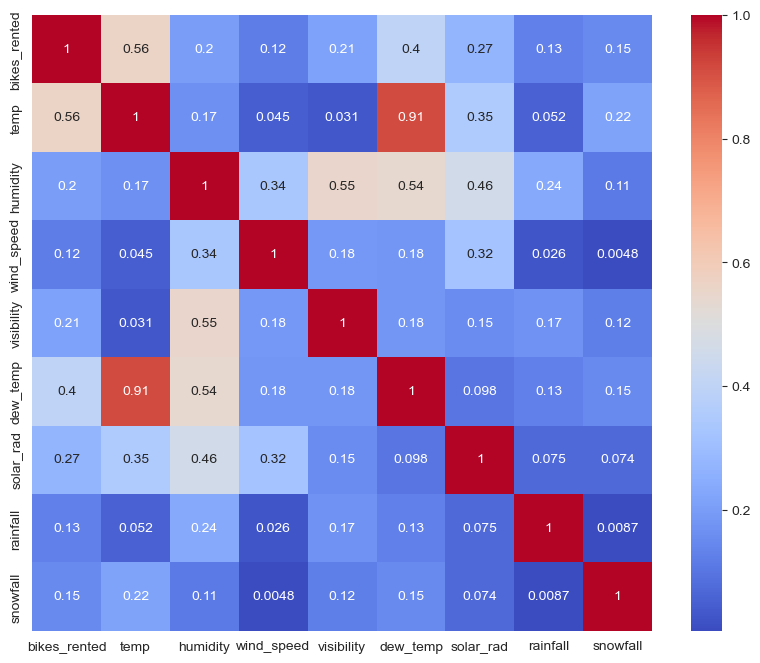

In [101]:
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

## From this graph we are able to see that there is multicollinearity in temperature(°C) and dev point temperature(°C) column.

In [102]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [103]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,bikes_rented,4.008648
1,temp,35.033161
2,humidity,5.060616
3,wind_speed,4.684299
4,visibility,9.051638
5,dew_temp,16.282132
6,solar_rad,2.888166
7,rainfall,1.099397
8,snowfall,1.121951


In [104]:
df.drop(columns=['dew_temp'],inplace=True)

In [105]:
df.head(2)

,bikes_rented,temp,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0


In [106]:
new_df=pd.get_dummies(df,drop_first=True,sparse=True)

In [107]:
new_df.head(2)

,bikes_rented,temp,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0


## We saw that our dependent variable is right skewed, it needs to be normalized.
## We do some experiments to normalize it

Text(0.5, 1.0, 'Square root')

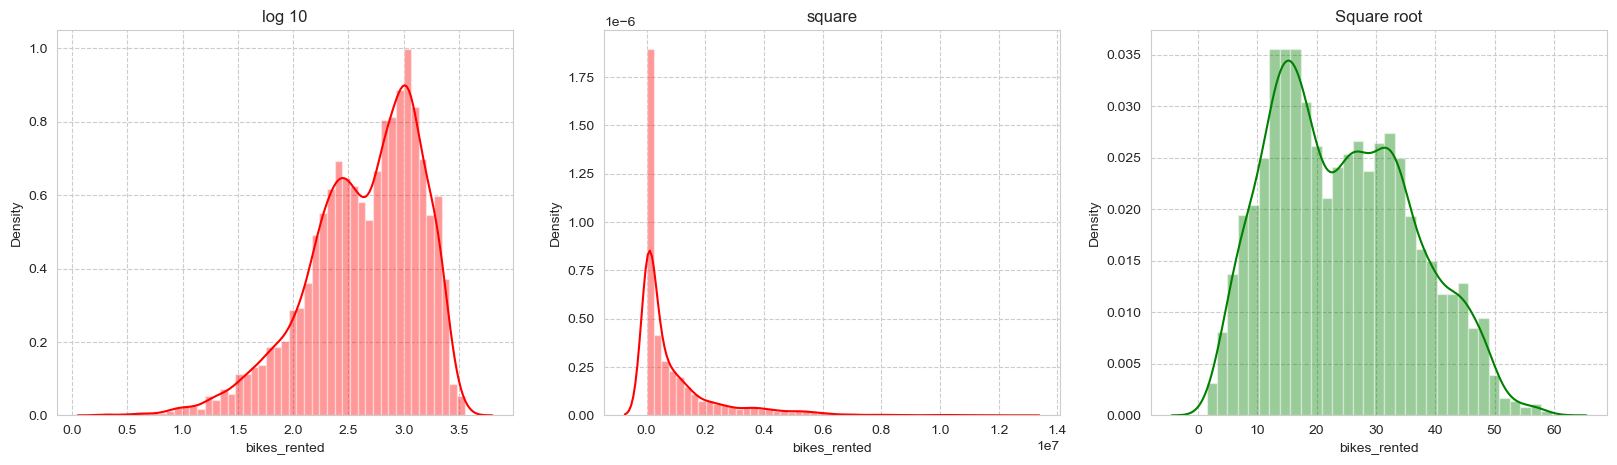

In [108]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(new_df['bikes_rented']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((new_df['bikes_rented']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(new_df['bikes_rented']),ax=axes[2], color='green').set_title("Square root")

## Our data in green plot is normalized to some extent: so we will go with square root on our dependent variable

In [ ]:
X = new_df.drop(columns='bikes_rented')
y = np.sqrt(new_df['bikes_rented'])

In [ ]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [41]:
X_train.head()

,temp,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall
2997,7.1,96,1.3,1497,0.00,0.5,0.0
4264,23.6,42,2.1,2000,1.23,0.0,0.0
2458,19.9,44,2.7,1874,2.22,0.0,0.0
2897,17.4,79,2.3,614,0.03,0.0,0.0
2226,11.3,80,1.2,1978,0.00,0.0,0.0


In [42]:
X_test.head()

,temp,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall
33,-2.9,68,1.6,1487,0.30,0.0,0.0
3898,26.3,36,1.1,1133,2.88,0.0,0.0
766,-3.4,33,2.4,2000,0.00,0.0,0.0
8071,10.9,32,2.1,1581,1.85,0.0,0.0
4746,21.6,66,2.4,962,0.00,0.0,0.0


In [43]:
y_train.head()

2997     8.888194
4264    57.017541
2458    28.513155
2897    32.649655
2226     5.099020
Name: bikes_rented, dtype: float64

In [44]:
y_test.head()

33      18.110770
3898    32.526912
766     16.522712
8071    32.202484
4746    48.764741
Name: bikes_rented, dtype: float64

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6295, 7), (2099, 7), (6295,), (2099,))

## Creating a function for calculate score

In [46]:
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))


## transforming X_train and X_test

In [47]:
yeo = PowerTransformer()
X_train = yeo.fit_transform(X_train)
X_test = yeo.transform(X_test)

# Model 1 Linear Regression

In [48]:
# Fitting the model
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [49]:

regression.score(X_train,y_train)

0.5276456646424041

In [50]:
#predicting 
reg_pred = regression.predict(X_test)

In [51]:
score_metrics(y_test,reg_pred)

mean absolute error is  : 336.6339552431673
mean squared error is  : 239870.25770152325
Root mean squared error is  : 489.7655129768972
R2 score is  : 0.41737036646342374


In [52]:
 regression.coef_

array([ 7.6133082 , -2.16296308,  0.89259431,  0.35888134,  0.27294525,
       -3.11307409, -0.09606791])

In [53]:
regression.intercept_

24.310368143031592

# Lasso

In [54]:
L1 = Lasso(alpha=0.001, max_iter=1000)
L1.fit(X_train,y_train)
L1.score(X_train,y_train)

0.5276456405490721

In [55]:
L1_pred = L1.predict(X_test)
score_metrics(y_test,L1_pred)

mean absolute error is  : 336.63321808534323
mean squared error is  : 239870.85936343795
Root mean squared error is  : 489.7661272111802
R2 score is  : 0.41736890506481494


In [56]:
L1.coef_

array([ 7.61315425, -2.16359901,  0.8919671 ,  0.35816614,  0.27223556,
       -3.11210863, -0.09514815])

In [57]:
L1.intercept_

24.310368143031592

## Cross Validation

In [58]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [59]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -66.94692832968244


In [60]:
lasso_pred = lasso_regressor.predict(X_test)
score_metrics(y_test,lasso_pred)

mean absolute error is  : 336.6333616455342
mean squared error is  : 239869.44541538172
Root mean squared error is  : 489.7646837159471
R2 score is  : 0.4173723394549129


## Ridge

In [61]:
L2 = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
L2_regressor = GridSearchCV(L2, parameters, scoring='neg_mean_squared_error', cv=5)
L2_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [62]:
print("The best fit alpha value is found out to be :" ,L2_regressor.best_params_)
print("\nUsing ",L2_regressor.best_params_, " the negative mean squared error is: ", L2_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -66.94498288671397


In [63]:
L2_pred = L2_regressor.predict(X_test)
score_metrics(y_test,L2_pred)

mean absolute error is  : 336.70429083062794
mean squared error is  : 239966.5150431076
Root mean squared error is  : 489.8637719234885
R2 score is  : 0.41713656348930805


## Polynomial 

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:


poly = PolynomialFeatures()
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

In [66]:
poly_X_train[:5]

array([[ 1.00000000e+00, -4.59707834e-01,  1.77294933e+00,
        -2.80282933e-01,  1.88911047e-02, -8.50794100e-01,
         3.96389213e+00, -2.36333005e-01,  2.11331292e-01,
        -8.15038695e-01,  1.28848260e-01, -8.68438884e-03,
         3.91116713e-01, -1.82223226e+00,  1.08644134e-01,
         3.14334932e+00, -4.96927438e-01,  3.34929715e-02,
        -1.50841483e+00,  7.02777988e+00, -4.19006442e-01,
         7.85585226e-02, -5.29485425e-03,  2.38463066e-01,
        -1.11101131e+00,  6.62401077e-02,  3.56873839e-04,
        -1.60724405e-02,  7.48823014e-02, -4.46459155e-03,
         7.23850601e-01, -3.37245604e+00,  2.01070726e-01,
         1.57124408e+01, -9.36798536e-01,  5.58532891e-02],
       [ 1.00000000e+00,  8.83541287e-01, -7.73110636e-01,
         5.39301869e-01,  9.82682084e-01,  1.28470209e+00,
        -2.55897190e-01, -2.36333005e-01,  7.80645206e-01,
        -6.83075166e-01,  4.76495467e-01,  8.68240194e-01,
         1.13508734e+00, -2.26095732e-01, -2.08809967e-

In [67]:
poly_X_test[:5]

array([[ 1.00000000e+00, -1.30588954e+00,  4.98285474e-01,
         5.98031721e-02,  8.87077805e-04,  2.36672676e-01,
        -2.55897190e-01, -2.36333005e-01,  1.70534750e+00,
        -6.50705791e-01, -7.80963370e-02, -1.15842563e-03,
        -3.09068372e-01,  3.34173464e-01,  3.08624799e-01,
         2.48288414e-01,  2.97990520e-02,  4.42017985e-04,
         1.17930556e-01, -1.27509853e-01, -1.17761303e-01,
         3.57641939e-03,  5.30500666e-05,  1.41537767e-02,
        -1.53034637e-02, -1.41334633e-02,  7.86907032e-07,
         2.09947078e-04, -2.27000717e-04, -2.09645763e-04,
         5.60139554e-02, -6.05638726e-02, -5.59335645e-02,
         6.54833717e-02,  6.04769517e-02,  5.58532891e-02],
       [ 1.00000000e+00,  1.10121204e+00, -1.08423185e+00,
        -5.35786471e-01, -6.03875290e-01,  1.64993883e+00,
        -2.55897190e-01, -2.36333005e-01,  1.21266796e+00,
        -1.19396917e+00, -5.90014513e-01, -6.64994741e-01,
         1.81693251e+00, -2.81797067e-01, -2.60252751e-

In [68]:
regression.fit(poly_X_train,y_train)

LinearRegression()

In [69]:
regression.score(poly_X_train,y_train)

0.6177936504824673

In [70]:
poly_pred = regression.predict(poly_X_test)

In [71]:
score_metrics(y_test,poly_pred)

mean absolute error is  : 291.7244498597756
mean squared error is  : 175154.22652086147
Root mean squared error is  : 418.5143086214156
R2 score is  : 0.5745614992534194


## Decission Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
tree = DecisionTreeRegressor()

## Bagging

In [75]:
from sklearn.ensemble import BaggingRegressor

In [76]:
len(X_train)

6295

In [77]:
n_est = [100]

In [78]:
sample = [1000]

In [82]:
#use bagging
bagging = BaggingRegressor(base_estimator=tree, n_estimators=1000, max_samples=1000, bootstrap=True, n_jobs=-1, random_state=42)

In [84]:
bagging.fit(poly_X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=1000,
                 n_estimators=1000, n_jobs=-1, random_state=42)

In [86]:
#show regression score
bagging.score(poly_X_train,y_train)

0.7749081848857421